     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


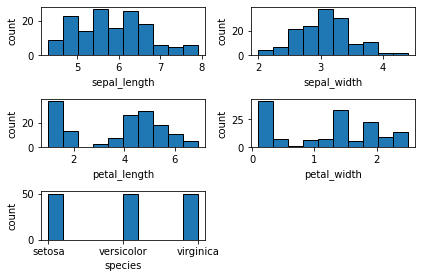

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


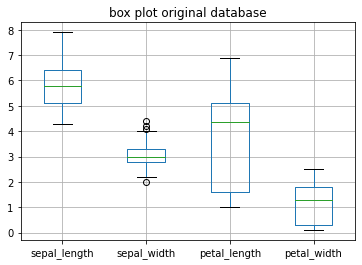

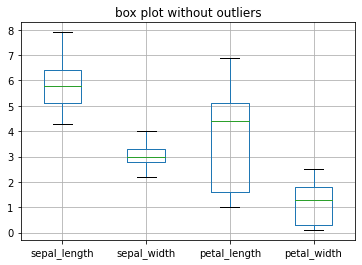

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/boxplot.py:405: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,


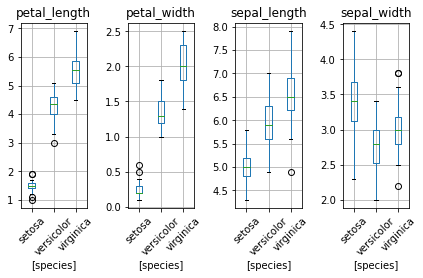

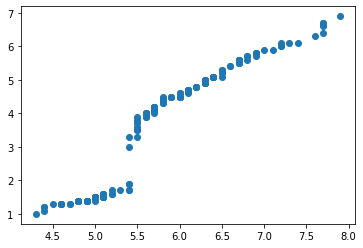

'\nsn.pairplot(iris_dataset, hue="species")\nplt.show()'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

iris_dataset = pd.read_csv('https://raw.githubusercontent.com/EduardoZaRo/Mineria-de-datos-571/main/1_Conociendo_tus_datos/iris.csv')
print(iris_dataset)
atributos = list(iris_dataset.columns.values)
print(atributos)
'''
#Histogramas
for i in atributos:
    plt.hist(iris_dataset[i], bins=10, edgecolor='black')
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()
'''
fig = plt.figure()
for i in range(len(atributos)):
    plt.subplot(3, 2, i+1)
    plt.hist(iris_dataset[atributos[i]], bins=10, edgecolor='black')
    plt.xlabel(atributos[i])
    plt.ylabel('count')
fig.tight_layout(pad = 1.2)
plt.show()
iris_dataset_sin_anomalias = iris_dataset
for i in atributos:
    if(i == "species"):
        break
    q1 = iris_dataset[i].quantile(0.25)
    q3  = iris_dataset[i].quantile(0.75)
    qr = q3-q1
    q3 = q3+1.5*qr
    q1 = q1-1.5*qr
    iris_dataset_sin_anomalias = iris_dataset_sin_anomalias[(iris_dataset_sin_anomalias[i] < q3) & (iris_dataset_sin_anomalias[i] > q1)]

print(iris_dataset.describe())

iris_dataset.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.title("box plot original database")
plt.show()

iris_dataset_sin_anomalias.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.title("box plot without outliers")
plt.show()

fig, axes = plt.subplots(1,4,sharex=False,sharey=False)
iris_dataset.boxplot(by="species", ax=axes, rot=45)
fig.suptitle('')
fig.tight_layout(pad = 1.2)
plt.show()


import numpy as np
iris_dataset = pd.read_csv("iris.csv")

sepal = iris_dataset[['sepal_length']].sort_values(by=['sepal_length'])
petal = iris_dataset[['petal_length']].sort_values(by=['petal_length'])

plt.plot(sepal,petal, "o")
plt.show()

'''
sn.pairplot(iris_dataset, hue="species")
plt.show()'''

['Brand_Name', 'How_Many_Sold', 'Current_Price', 'Product_details', 'RATING']
       How_Many_Sold  Current_Price       RATING
count   23142.000000   23142.000000  23142.00000
mean     3607.896552     842.258621      3.82069
std     10896.836132     387.523381      0.40462
min         2.000000     231.000000      2.40000
25%       173.000000     588.000000      3.60000
50%       406.500000     776.500000      4.00000
75%      1795.000000    1080.000000      4.00000
max     72611.000000    2159.000000      4.40000


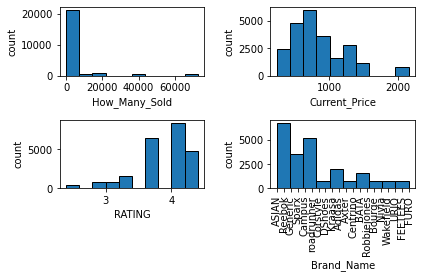

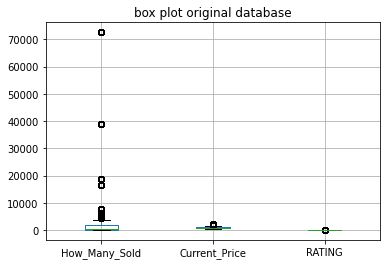

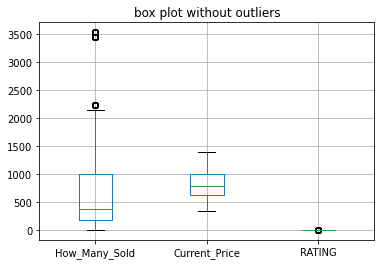

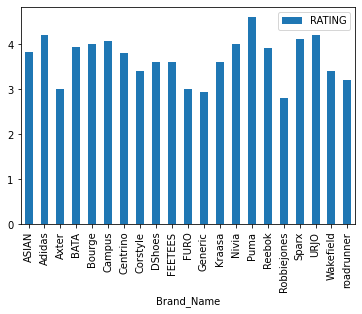

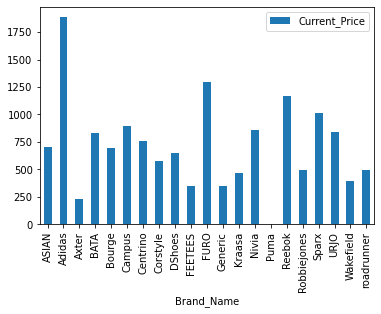

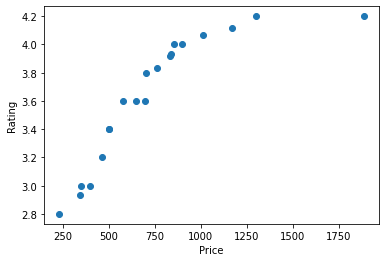

'\n#Pairplot respecto a marcas, IMPORTANTENO CAMBIAR KIND Y DIAG_KIND\nsn.pairplot(\n    men_shoes, \n    hue="Brand_Name", \n    kind = "scatter", \n    diag_kind= "hist")\nplt.show()'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
men_shoes = pd.read_csv('https://raw.githubusercontent.com/EduardoZaRo/Mineria-de-datos-571/main/1_Conociendo_tus_datos/MEN_SHOES.csv')

atributos = list(men_shoes.columns.values)

#Un poquito de limpieza
men_shoes = men_shoes.replace('[^A-Za-z0-9]+','', regex=True)
men_shoes.columns = men_shoes.columns.str.replace(' ', '')

#Se convierten a valores numericos para evitar cosas raras

men_shoes['How_Many_Sold'] = pd.to_numeric(men_shoes['How_Many_Sold'])
men_shoes['Current_Price'] = pd.to_numeric(men_shoes['Current_Price'])

#Hacemos algo con NaNs
men_shoes = men_shoes.dropna()

print(atributos)

#Estadisticas del dataset
print(men_shoes.describe())

#Se van a usar las columnas numericas para quitar outliers
men_shoes_sin_anomalias = men_shoes.select_dtypes(['number'])
atributos_sa = list(men_shoes_sin_anomalias.columns.values)

#Histogramas
fig = plt.figure()
for i in range(len(atributos_sa)):
    plt.subplot(2, 2, i+1)
    plt.hist(men_shoes_sin_anomalias[atributos_sa[i]], bins=10, edgecolor='black')
    plt.xlabel(atributos_sa[i])
    plt.ylabel('count')
plt.subplot(2, 2, 4)
plt.hist(men_shoes['Brand_Name'], bins=10, edgecolor='black')
plt.xlabel('Brand_Name')
plt.xticks(rotation ='vertical')
plt.ylabel('count')
fig.tight_layout(pad = 1.2)
plt.show()

#Boxplot original
men_shoes.boxplot(column=['How_Many_Sold', 'Current_Price', 'RATING'])
plt.title("box plot original database")
plt.show()

#Se quitan outliers con metodo cuantiles de la presentacion
for i in atributos_sa:
    q1 = men_shoes_sin_anomalias[i].quantile(0.25)
    q3  = men_shoes_sin_anomalias[i].quantile(0.75)
    qr = q3-q1
    q3 = q3+1.5*qr
    q1 = q1-1.5*qr
    men_shoes_sin_anomalias = men_shoes_sin_anomalias[(men_shoes_sin_anomalias[i] < q3) & (men_shoes_sin_anomalias[i] > q1)]

#Boxplot sin outliers
men_shoes_sin_anomalias.boxplot(column=['How_Many_Sold', 'Current_Price', 'RATING'])
plt.title("box plot without outliers")
plt.show()

#Barplots
dataset = pd.read_csv("MEN_SHOES.csv")
dataset = dataset.replace('[^A-Za-z0-9]+','', regex=True)
dataset.columns = dataset.columns.str.replace(' ', '')
dataset['How_Many_Sold'] = pd.to_numeric(dataset['How_Many_Sold'])
dataset['Current_Price'] = pd.to_numeric(dataset['Current_Price'])

dataset = dataset.groupby('Brand_Name').mean().reset_index()
dataset.plot('Brand_Name', 'RATING', kind='bar')
plt.show()
dataset.plot('Brand_Name', 'Current_Price', kind='bar')
plt.show()


rating = dataset[['RATING']].sort_values(by=['RATING'])
price = dataset[['Current_Price']].sort_values(by=['Current_Price'])
plt.plot(price,rating, "o")
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

'''
#Pairplot respecto a marcas, IMPORTANTENO CAMBIAR KIND Y DIAG_KIND
sn.pairplot(
    men_shoes, 
    hue="Brand_Name", 
    kind = "scatter", 
    diag_kind= "hist")
plt.show()'''

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
       Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0

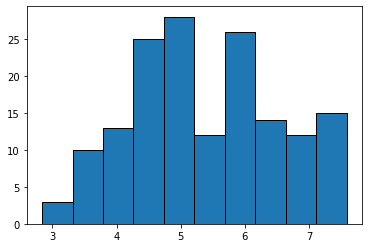

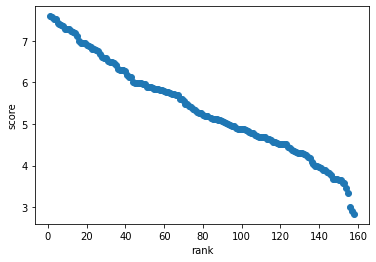

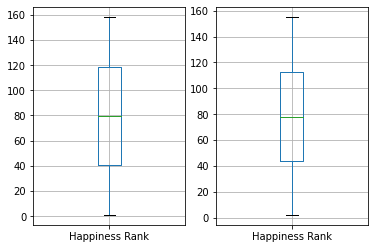

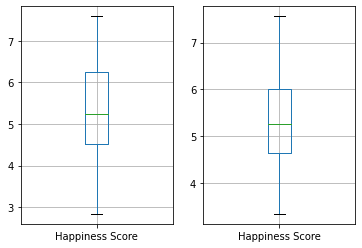

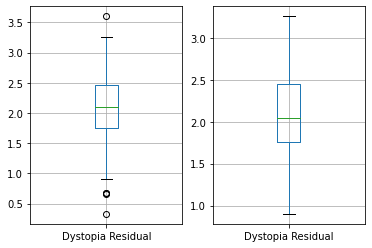

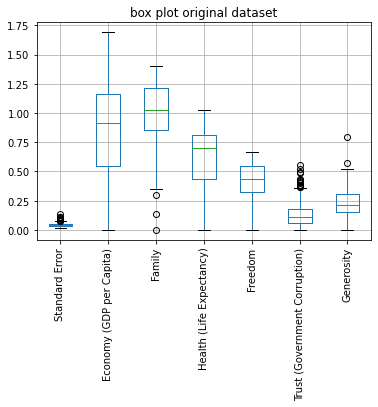

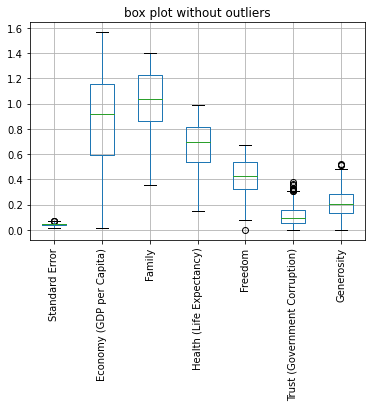

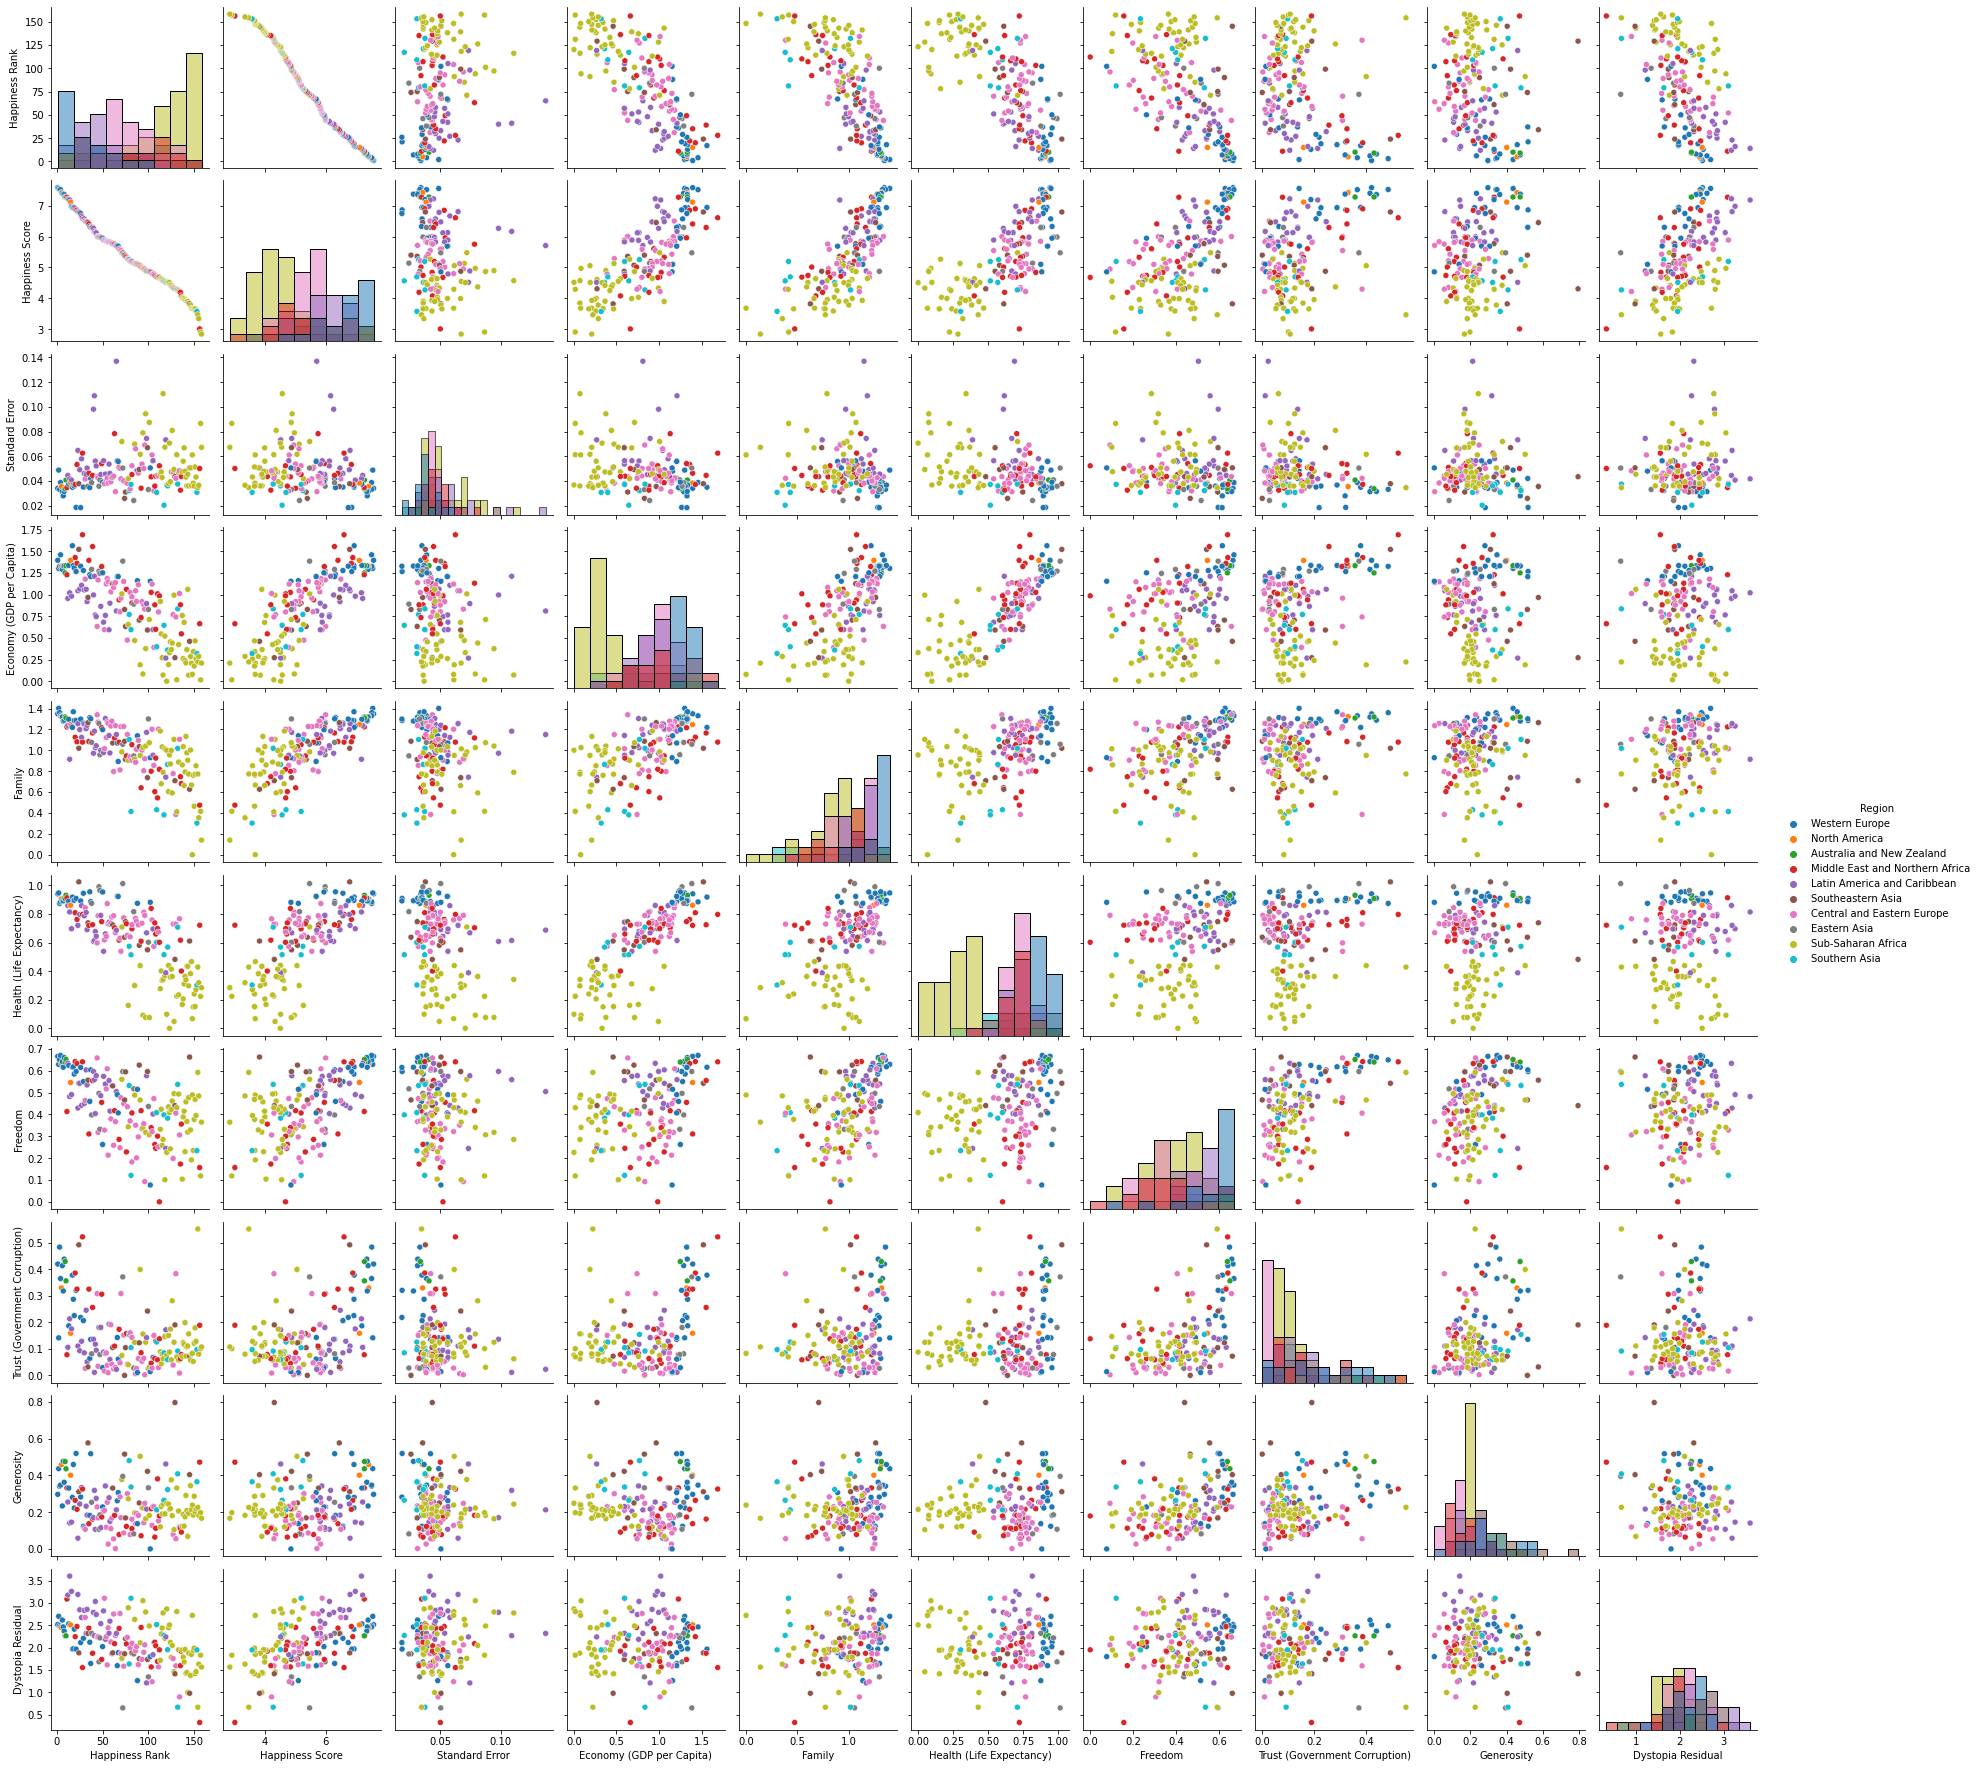

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
happiness = pd.read_csv('https://raw.githubusercontent.com/EduardoZaRo/Mineria-de-datos-571/main/1_Conociendo_tus_datos/2015.csv')
atributos = list(happiness.columns.values)
print(atributos)
'''
for i in range(len(atributos)):
    plt.hist(happiness[atributos[i]], bins=10, edgecolor='black')
    plt.xticks(rotation='vertical')
    plt.xlabel(atributos[i])
    plt.ylabel('count')
    plt.show()
'''

print(happiness.describe())

hapiness = happiness.select_dtypes(['number'])
happiness_sin_anomalias = happiness.select_dtypes(['number'])
atributos_sin_anomalias = list(happiness_sin_anomalias.columns.values)
for i in atributos_sin_anomalias:
    q1 = happiness_sin_anomalias[i].quantile(0.25)
    q3  = happiness_sin_anomalias[i].quantile(0.75)
    qr = q3-q1
    q3 = q3+1.5*qr
    q1 = q1-1.5*qr
    happiness_sin_anomalias = happiness_sin_anomalias[(happiness_sin_anomalias[i] < q3) & (happiness_sin_anomalias[i] > q1)]
plt.hist(hapiness['Happiness Score'], bins=10, edgecolor='black')
plt.show()

score = hapiness[['Happiness Score']]
rank = hapiness[['Happiness Rank']].sort_values(by=['Happiness Rank'])
plt.plot(rank,score, "o")
plt.xlabel('rank')
plt.ylabel('score')
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=2)
happiness.boxplot(column=['Happiness Rank'], ax = axes[0])
happiness_sin_anomalias.boxplot(column=['Happiness Rank'], ax = axes[1])
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2)
happiness.boxplot(column=['Happiness Score'], ax = axes[0])
happiness_sin_anomalias.boxplot(column=['Happiness Score'], ax = axes[1])
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2)
happiness.boxplot(column=['Dystopia Residual'], ax = axes[0])
happiness_sin_anomalias.boxplot(column=['Dystopia Residual'], ax = axes[1])
plt.show()


happiness.boxplot(column=['Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity'])
plt.title("box plot original dataset")
plt.xticks(rotation='vertical')
plt.show()

happiness_sin_anomalias.boxplot(column=['Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity'])
plt.title("box plot without outliers")
plt.xticks(rotation='vertical')
plt.show()

#Pairplot respecto a regiones, IMPORTANTENO CAMBIAR KIND Y DIAG_KIND
sn.pairplot(
    happiness, 
    hue="Region", 
    kind = "scatter", 
    diag_kind= "hist")
plt.show()